In [59]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
df = pd.read_parquet("data/cnb_vyber.parquet")
df['rok'] = df["008"].apply(lambda x: najdi_rok(x))
df = df[df['rok'].notnull()]
df = df[df['100_7'].notnull()]

In [9]:
df.shape

(438883, 64)

In [121]:
def pauzovalo(rocnik):

    dfp = df.copy()

    delka_pauzy = 10
    kolik_vydano = 3

    kolik_knih = dfp[dfp['rok'] < rocnik].groupby('100_7').size()
    uz_vydavali = kolik_knih[kolik_knih >= kolik_vydano].index.to_list()
    dfp = dfp[dfp['100_7'].isin(uz_vydavali)]
    
    tesnepred = dfp[dfp['rok'].isin(range(rocnik-5,rocnik))]['100_7'].drop_duplicates().to_list()
    po = dfp[(dfp['rok'] >= (rocnik + delka_pauzy + 1)) & (dfp['100_7'].isin(tesnepred))]['100_7'].drop_duplicates().to_list()
    behem = dfp[(dfp['rok'].isin(range(rocnik,rocnik + delka_pauzy + 1))) & (dfp['100_7'].isin(po))]['100_7'].drop_duplicates().to_list()
    
    return 1 - (len(behem) / len(po))

In [90]:
pauzovalo(1967)

0.5411507171562061

In [98]:
pauzovalo(2010)

0.3618371998892227

In [123]:
pauzy = {}
for i in range(1918,2001):
    print(i, end=", ")
    pauzy[i] = pauzovalo(i)
pauzy = pd.Series(pauzy)

1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 

<Axes: >

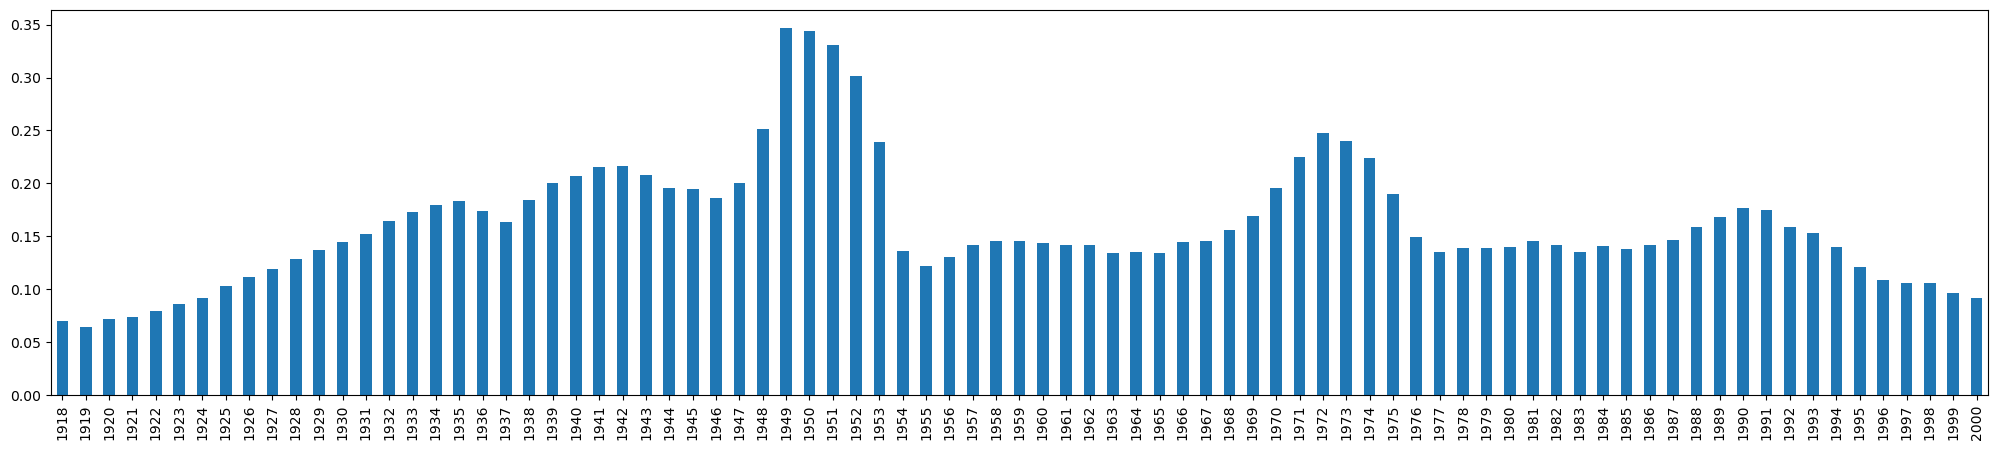

In [124]:
pauzy.plot.bar(figsize=(25,5))

In [127]:
pauzy.nlargest(10)

1949    0.346728
1950    0.343829
1951    0.330827
1952    0.301154
1948    0.251270
1972    0.247107
1973    0.239973
1953    0.239053
1971    0.224905
1974    0.224185
dtype: float64

In [129]:
pauzy.median()

0.14555765595463133

<Axes: >

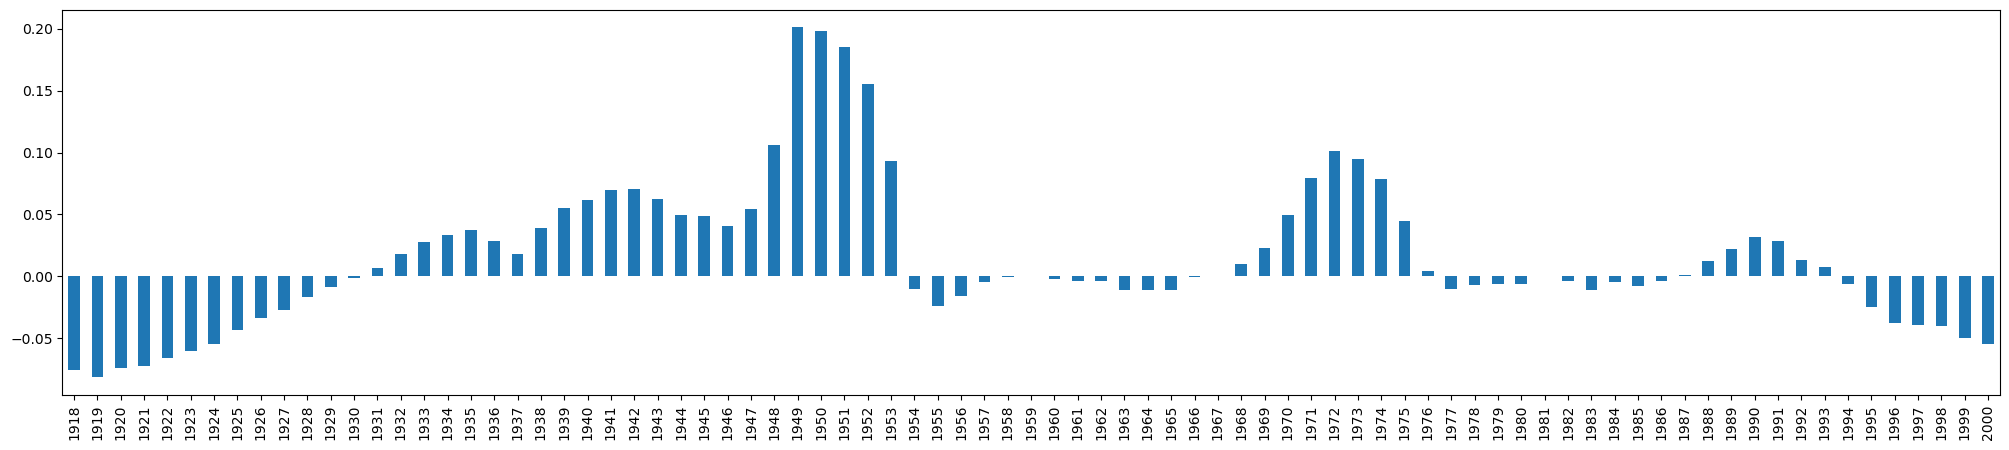

In [131]:
(pauzy - pauzy.median()).plot.bar(figsize=(25,5))